In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [9]:
from sklearn.linear_model import LinearRegression

In [11]:
from sklearn.model_selection import train_test_split

In [14]:
df=pd.read_csv("Bengaluru_House_Data_edited.csv")

In [15]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [16]:
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
990,Super built-up Area,19-Jan,Mysore Road,2 BHK,NaN,1175,2.0,1.0,73.50
991,Built-up Area,Ready To Move,Hoodi,2 BHK,Goeur G,1425,2.0,2.0,80.00
992,Plot Area,Ready To Move,Chikkabanavar,1 Bedroom,NaN,1200,1.0,0.0,20.00
993,Plot Area,18-Aug,ITPL,3 Bedroom,NaN,1200,3.0,1.0,56.12


In [28]:
X=df[['total_sqft', 'bath', 'balcony']]

In [29]:
y=df['price']

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [31]:
X_train

,total_sqft,bath,balcony
747,4300.0,5.0,2.0
662,1075.0,2.0,1.0
783,1120.0,2.0,0.0
633,3800.0,4.0,3.0
951,1639.0,3.0,1.0
...,...,...,...
734,3205.0,5.0,1.0
136,1360.0,2.0,1.0
321,1128.0,2.0,1.0
913,1170.0,2.0,3.0


In [32]:
X

,total_sqft,bath,balcony
0,1056.0,2.0,1.0
1,2600.0,5.0,3.0
3,1521.0,3.0,1.0
5,1170.0,2.0,1.0
11,2785.0,5.0,3.0
...,...,...,...
985,1161.0,2.0,1.0
986,645.0,1.0,0.0
989,665.0,1.0,1.0
991,1425.0,2.0,2.0


In [33]:
lm=LinearRegression()

In [34]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [26]:
listtsqft=[]
for i in df["total_sqft"]:
    if '-' in i:
        x=i.find(" ")
        listtsqft.append(int(i[0:x]))
    else:
        listtsqft.append(float(i[0:]))

In [24]:
df.dropna(inplace=True)

In [27]:
df['total_sqft']=listtsqft

In [35]:
print(lm.intercept_)

-53.375097059365274


In [36]:
print(lm.coef_)

[ 6.01074665e-03  5.83085810e+01 -3.71937583e+00]


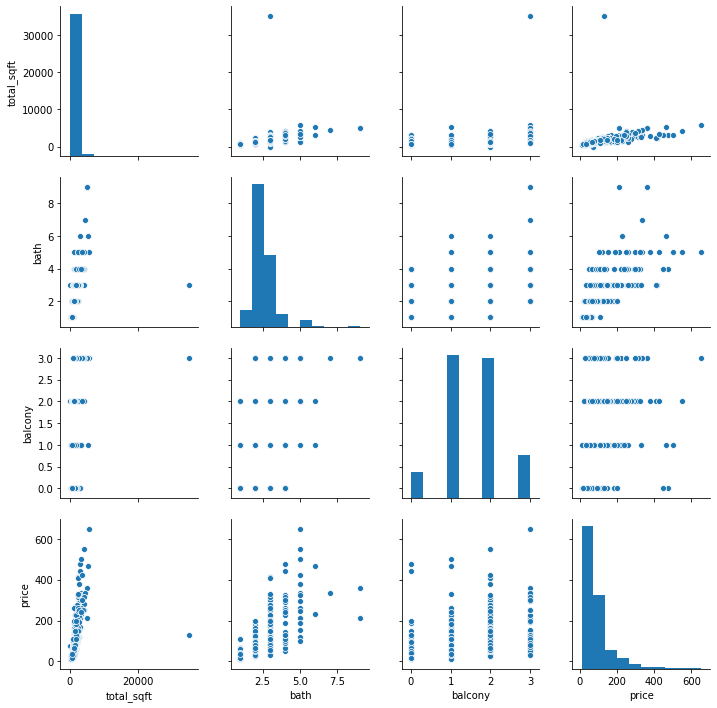

In [37]:
 sns.pairplot(df)

In [39]:
X1=np.array(X)

In [43]:
X1.reshape(-1,1)

array([[1.056e+03],
       [2.000e+00],
       [1.000e+00],
       ...,
       [1.255e+03],
       [2.000e+00],
       [2.000e+00]])

In [46]:
y_predict=lm.predict(X_test)

In [45]:
y_test

44      91.790
891     51.910
306     26.000
454    325.000
923     43.415
        ...   
825     75.000
847     58.935
450    252.000
861     41.000
161     32.000
Name: price, Length: 174, dtype: float64

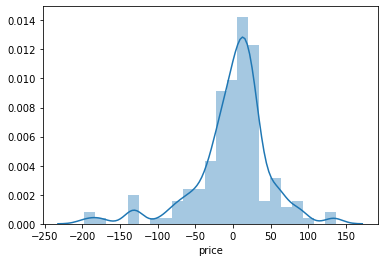

In [47]:
sns.distplot(y_predict-y_test)